### 0. 알고리즘 순서도 

알고리즘 순서는 다음과 같습니다. 
1. Key point 추출 하여 Descripter 생성 
2. Matching 알고리즘을 통하여 두 이미지 간의 이미지 매칭 추출  
3. 아웃라이어 제거 후 H 행렬 추출 
4. H를 이용하여 이미지 변형 
5. 이미지 블랜딩 
6. 합성 

### 1. OpenCv Docs

https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html


1. SIFT : https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
2. Feature Matcher https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
3. RANSAC: 아래 그림 참조 

![./docs/screen/ransac1.png](./docs/screen/ransac1.png)

![./docs/screen/ransac2.png](./docs/screen/ransac2.png)


### 2. Function Review

#### 2-1. Key Point 추출 - SIFT (Scale-Invariant Feature Transform)


##### **1. 스케일 스페이스 생성 (Scale-Space Extrema Detection)**

* **목적**: 다양한 크기에서 특징점을 찾기 위해 이미지의 스케일을 확장
* **방법**:

  * 이미지에 점진적으로 가우시안 블러를 적용하여 옥타브(Octave)와 레벨(Level) 생성
  * Difference of Gaussian (DoG) 사용
* **수식**:

$$
L(x, y, \sigma) = G(x, y, \sigma) * I(x, y)  
$$

$$
D(x, y, \sigma) = L(x, y, k\sigma) - L(x, y, \sigma)  
$$

* **핵심 아이디어**:

  * DOG (Difference of Gaussian)를 사용하여 빠르게 스케일 불변 특징 계산

##### **2. 키포인트 후보 검출 (Keypoint Localization)**

* **목적**: 스케일 스페이스에서 극값 (Local Extrema) 검출
* **방법**:

  * 각 픽셀이 주변 26개 픽셀과 비교하여 극대점 또는 극소점인지 판단
* **강화 필터링**:

  * 대비가 낮거나 가장자리인 특징점 제거 (Hessian Matrix 활용)

##### **3. 방향 할당 (Orientation Assignment)**

* **목적**: 회전에 불변한 특징점 생성
* **방법**:

  * 각 키포인트의 주변 그라디언트 방향을 계산하여 대표 방향 부여
* **핵심 수식**:

$$
\theta(x, y) = \tan^{-1}\left(\frac{L_y}{L_x}\right)  
$$

##### **4. 키포인트 서술자 생성 (Keypoint Descriptor)**

* **목적**: 각 키포인트를 고유하게 표현할 수 있는 벡터 생성
* **방법**:

  * 16x16 영역을 4x4의 그리드로 분할하여 각 영역의 방향 히스토그램을 계산하여 128차원 벡터로 표현
* **핵심 수식**:

$$
M = \sqrt{L_x^2 + L_y^2}  
$$

##### ✅ SIFT의 장점

* **강력한 불변성**: 스케일, 회전, 조명 변화에 강건함
* **정밀한 특징점 매칭**: 복잡한 장면에서도 높은 정확도
* **넓은 적용 범위**: 이미지 정합, 객체 인식, SLAM 등 다양한 응용 가능

---

##### ⚠️ SIFT의 단점

* **속도 문제**: 계산 복잡도가 높아 실시간 시스템에 부적합
* **메모리 요구량**: 특징점 서술자가 128차원으로 메모리 사용량이 큼
* **특허 문제**: 초기에는 특허로 보호되어 상업적 사용이 제한적이었으나, 현재는 만료

---


##### 대체 알고리즘 
| 알고리즘                                                   | 특징            | 장점                 | 단점                       | 주요 적용 분야                    |
| ------------------------------------------------------ | ------------- | ------------------ | ------------------------ | --------------------------- |
| **SURF (Speeded-Up Robust Features)**                  | SIFT의 속도 개선   | 빠른 특징점 추출, 스케일 불변성 | 특허 문제 (최근 만료), 높은 메모리 사용 | Panorama, 3D Reconstruction |
| **ORB (Oriented FAST and Rotated BRIEF)**              | 바이너리 특징점, 고속  | 빠른 매칭, 낮은 메모리 사용   | 회전 불변성 낮음, 정밀도 낮음        | 실시간 영상 처리, SLAM             |
| **AKAZE (Accelerated-KAZE)**                           | 비선형 스케일 스페이스  | 높은 정확도, 빠른 속도      | 복잡한 구조에서 성능 저하           | 실시간 영상, 객체 추적               |
| **BRISK (Binary Robust Invariant Scalable Keypoints)** | 회전 불변성, 빠른 처리 | 저전력, 고속            | 긴 거리 매칭 성능 저하            | 임베디드 시스템, 로봇 비전             |
| **FREAK (Fast Retina Keypoint)**                       | 생체 영감, 저전력    | 저전력, 고속            | 복잡한 장면에서 성능 저하           | 모바일 기기, IoT                 |
| **Harris Corners**                                     | 코너 기반 특징점     | 단순하고 빠름            | 스케일 불변성 없음               | 간단한 피쳐 매칭                   |
| **FAST (Features from Accelerated Segment Test)**      | 매우 빠른 코너 검출   | 높은 속도, 단순성         | 불안정한 회전 불변성              | 저전력, 실시간 비전                 |
| **SuperPoint(SuperGlue)**                                         | 딥러닝 기반        | 높은 정확도, 강력한 특징점 추출 | 높은 연산 비용                 | SLAM, AR/VR                 |
| **D2-Net**                                             | 밀도 기반 특징점     | 강력한 3D 복원 성능       | 느린 추출 속도                 | 3D 구조 복원                    |
| **R2D2 (Reliable and Repeatable)**                     | 안정적 특징점       | 빠른 처리, 높은 재현성      | 복잡한 구조에서 성능 저하           | 로봇 내비게이션                    |


#### 2-2. Matching 알고리즘 - FLANN vs BFMatcher 

##### 📘 이미지 매칭 알고리즘 개요

* **정의**: 두 이미지의 특징점을 연결하여 공통 영역을 찾는 방법.
* **목적**:

  * 이미지 스티칭
  * 객체 인식
  * 동영상 트래킹
  * SLAM (Simultaneous Localization and Mapping)

---

##### **1. BFMatcher (Brute-Force Matcher)**

* **작동 원리**:

  * 각 특징점에 대해 모든 다른 특징점과의 유클리디안 거리를 계산하여 가장 가까운 점을 선택.
* **장점**:

  * 간단한 구현.
  * 모든 거리 계산을 수행하여 매우 정확한 매칭.
* **단점**:

  * 매우 느림 (특히 고차원 데이터).
  * 메모리 사용량이 많음.
* **적용 사례**:

  * 작은 이미지, 간단한 매칭.
* **수식**:

$$
d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
$$

---

##### **2. FLANN (Fast Library for Approximate Nearest Neighbors)**

* **작동 원리**:

  * 근사 최근접 탐색 (Approximate Nearest Neighbor) 알고리즘.
  * **K-D Tree** 또는 \*\*LSH (Locality-Sensitive Hashing)\*\*를 사용하여 고차원 특징점의 매칭 속도 향상.
* **장점**:

  * 매우 빠름.
  * 대용량 데이터셋 처리에 강함.
* **단점**:

  * 복잡한 설정 필요.
  * 정확도는 BFMatcher보다 낮을 수 있음.
* **적용 사례**:

  * 대형 이미지, 실시간 응용, 3D 매핑.

---

##### **3. Lowe's Ratio Test**

* **작동 원리**:

  * 두 번째로 가까운 매칭과의 거리 비율을 사용하여 잘못된 매칭을 필터링.
* **장점**:

  * 간단한 구현.
  * 잘못된 매칭 효과적으로 제거.
* **단점**:

  * 매칭이 많을 때 정확도 저하 가능.
* **적용 사례**:

  * 이미지 스티칭, SLAM.
* **수식**:

$$
\frac{d_1}{d_2} < R
$$

---


| **알고리즘**                                                   | **주요 특징**    | **장점**            | **단점**             | **적용 사례**               |
| ---------------------------------------------------------- | ------------ | ----------------- | ------------------ | ----------------------- |
| **BFMatcher (Brute-Force)**                                | 단순 거리 기반 매칭  | 간단하고 직관적          | 느림, 메모리 사용량 큼      | 간단한 매칭, 작은 이미지          |
| **FLANN (Fast Library for Approximate Nearest Neighbors)** | 근사 최근접 탐색    | 매우 빠름, 고차원 데이터 처리 | 복잡한 설정             | 대형 이미지, 실시간 응용          |
| **K-D Tree**                                               | 공간 분할 트리     | 빠른 검색             | 고차원 데이터에 취약        | 실시간 3D 인식               |
| **LSH (Locality-Sensitive Hashing)**                       | 해시 기반 매칭     | 고차원 데이터에 강함       | 메모리 사용량 큼          | 이미지 검색, 얼굴 인식           |
| **Ball Tree**                                              | 계층적 공간 분할    | 노이즈에 강함           | 데이터셋의 분포에 따라 성능 변화 | 복잡한 구조 매칭               |
| **ANN (Approximate Nearest Neighbor)**                     | 근사 매칭        | 빠른 탐색             | 정확도 낮음             | 실시간 영상 처리               |
| **SuperGlue**                                              | GNN 기반       | 매우 높은 정확도         | 높은 연산 비용           | SLAM, 3D Reconstruction |
| **SuperPoint**                                             | CNN 기반       | 높은 정확도            | 사전 학습 필요           | Visual Odometry, AR     |
| **KNN (K-Nearest Neighbors)**                              | 단순 거리 기반     | 간단한 구현            | 고차원에서 느림           | 기본 특징점 매칭               |
| **HNSW (Hierarchical Navigable Small World)**              | 그래프 기반 근접 탐색 | 매우 빠른 탐색          | 복잡한 데이터 구조         | 대규모 데이터 검색              |
| **Faiss (Facebook AI Similarity Search)**                  | 벡터 근접 탐색     | 매우 빠른 탐색, GPU 가속  | 설치 복잡도             | 대규모 추천 시스템              |
| **AKAZE (Accelerated-KAZE)**                               | 비선형 스케일 공간   | 빠른 특징점 검출         | 상대적으로 낮은 정확도       | 실시간 비전 시스템              |
| **ORB (Oriented FAST and Rotated BRIEF)**                  | 바이너리 특징점     | 빠른 속도, 저비용        | 회전 불변성 낮음          | 모바일 AR, SLAM            |
| **SNN (Sparse Nearest Neighbor)**                          | 희소 매칭        | 메모리 효율성           | 낮은 정확도             | 대용량 데이터 매칭              |


#### 2-3. Outlier 제거 알고리즘 - RANSAC(RANdom SAmple Consensus)

츨처: https://gnaseel.tistory.com/33

##### 📘 RANSAC 알고리즘 개요

RANSAC(RANdom SAmple Consensus)은 노이즈가 많은 데이터셋에서 이상치를 제거하고 최적의 모델을 추정하는 알고리즘입니다. 컴퓨터 비전 분야에서 주로 사용되며, 특히 호모그래피 추정, 직선 및 원 검출 등에 활용됩니다.

##### 🔍 작동 원리

무작위 샘플링데이터셋에서 최소한의 점들을 무작위로 선택하여 모델을 생성합니다.

모델 검증전체 데이터셋에서 생성된 모델과의 오차가 임계값 이하인 점들을 인라이어(inlier)로 간주합니다.

최적 모델 선택가장 많은 인라이어를 갖는 모델을 최적 모델로 선택합니다.

반복 수행위 과정을 사전에 정한 횟수만큼 반복하여 최적의 모델을 찾습니다.

##### ⚙️ 주요 파라미터

N: 반복 횟수. 높은 확률로 최적의 모델을 찾기 위해 설정됩니다.

T: 임계값. 데이터 점이 모델에 얼마나 가까워야 인라이어로 간주할지를 결정합니다.

p: 성공 확률. 인라이어만으로 구성된 샘플을 얻을 확률입니다.

α: 데이터셋에서 인라이어의 비율입니다.

##### ✅ 장점

이상치에 강건함: 노이즈나 이상치가 많은 데이터에서도 안정적인 모델 추정이 가능합니다.

단순한 구현: 알고리즘이 직관적이며 구현이 비교적 간단합니다.

##### ⚠️ 한계점

비결정성: 무작위 샘플링으로 인해 실행할 때마다 결과가 달라질 수 있습니다.

반복 횟수 설정의 어려움: 최적의 반복 횟수를 사전에 결정하기 어렵습니다.

밀집된 데이터 처리의 한계: 데이터가 밀집되어 있는 경우, 임계값 설정에 따라 성능이 저하될 수 있습니다.

특정 구조의 이상치 문제: 이상치가 특정 구조를 이루는 경우, 잘못된 모델을 선택할 수 있습니다.

##### 추가 고려사항 
| **알고리즘**                                                    | **주요 특징**          | **장점**              | **단점**              | **적용 사례**             |
| ----------------------------------------------------------- | ------------------ | ------------------- | ------------------- | --------------------- |
| **RANSAC (Random Sample Consensus)**                        | 무작위 샘플링, 반복적 모델 추정 | 간단한 구현, 이상치 제거에 효과적 | 반복 횟수 설정의 어려움, 비결정성 | 호모그래피 추정, 직선/평면 검출    |
| **MLESAC (Maximum Likelihood Estimation Sample Consensus)** | 최대 우도 추정 기반        | 높은 정확도, 안정성         | 계산 복잡도 높음           | 카메라 캘리브레이션, 로봇 비전     |
| **LMEDS (Least Median of Squares)**                         | 중앙값 최소화            | 강력한 이상치 제거 성능       | 계산 속도 저하            | 라이다 데이터 처리            |
| **PROSAC (Progressive Sample Consensus)**                   | 데이터 품질 기반 샘플링      | 빠른 수렴               | 데이터 품질 정보 필요        | 대형 이미지 매칭             |
| **MSAC (M-Estimator Sample Consensus)**                     | 잔차 가중치 적용          | 높은 정확도              | 복잡한 계산              | 고정밀 비전 시스템            |
| **R-RANSAC (Reweighted RANSAC)**                            | 인라이어 가중치 재평가       | 높은 정확도, 안정성         | 초기 모델의 민감성          | 3D 구조 복원              |
| **USAC (Universal Sample Consensus)**                       | 통합형 접근             | 높은 정확도, 빠른 수렴       | 복잡한 구현              | 복잡한 장면 이해             |
| **DEGENSAC (Degenerate Sample Consensus)**                  | 특이점 제거             | 복잡한 데이터에 강건함        | 높은 계산 비용            | 복잡한 구조 모델링            |
| **LO-RANSAC (Locally Optimized RANSAC)**                    | 지역 최적화             | 높은 정확도              | 더 복잡한 구현            | 고정밀 3D 모델링            |
| **GC-RANSAC (Graph-Cut RANSAC)**                            | 그래프 기반 최적화         | 높은 정확도, 빠른 수렴       | 메모리 사용량 큼           | 복잡한 장면 이해, 실시간 비전     |
| **MAGSAC (Maximum A Posteriori SAmple Consensus)**          | MAP 기반 샘플링         | 매우 높은 정확도           | 높은 계산 비용            | 복잡한 3D 복원             |
| **NAPSAC (NAdjacent Point Sample Consensus)**               | 인접한 점 샘플링          | 국소적 최적화             | 큰 스케일 변화에서 약함       | 고정밀 카메라 캘리브레이션        |
| **ORSA (Optimized RANSAC)**                                 | 최적화된 샘플링 전략        | 더 빠른 수렴             | 계산 복잡도              | 대형 이미지 매칭             |
| **RHO (Real-time Homography)**                              | 실시간 처리             | 매우 빠른 처리            | 복잡한 장면에서 약함         | 실시간 비전 시스템            |
| **GMS (Grid-based Motion Statistics)**                      | 격자 기반              | 빠른 특징점 필터링          | 복잡한 장면에서 성능 저하      | SLAM, Visual Odometry |



#### 2-4 이미지  재투영(image  reprojection)

##### Cylinder Projection Overview

---
![./docs/screen/cylinder1.png](docs/screen/cylinder1.png) ![./docs/screen/cylinder2.png](docs/screen/cylinder2.png) 
##### 🎯 기본 개념

* Cylinder Projection (원통형 투영)은 파노라마 이미지 스티칭에서 널리 사용되는 기법으로, 넓은 수평 시야각을 가진 장면에서 중심부의 왜곡을 줄이고 자연스러운 이미지를 생성하는 데 효과적입니다.
* **핵심 특징**:

  * 수평 직선은 곡선으로 변형되지만, 수직 직선은 그대로 유지됩니다.
  * 넓은 시야각에서도 중심부의 왜곡이 적습니다.
  * 건축물이나 도시 경관 촬영에 적합합니다.

---

##### 🛠️ 주요 단계

##### **1. Cylindrical Projection (Forward Warping)**

* 각 이미지의 점을 원통 좌표계로 변환하는 단계입니다.
* 주요 수식:

  * $\theta = \arctan\left(\frac{x}{f}\right)$
  * $h = \frac{y}{\sqrt{x^2 + f^2}}$
  * $x' = f \cdot \theta$
  * $y' = f \cdot h$
* 이 변환을 통해 각 픽셀을 원통 표면에 매핑하고, 이를 평면으로 펼쳐서 최종 이미지를 생성합니다.

##### **2. Cylindrical Warping (Inverse Warping)**

* 원통으로 투영된 이미지를 다시 평면 이미지로 복원하는 과정입니다.
* 필요한 정보:

  * Focal Length (f)
  * Principal Point (xc, yc)
* 주요 수식:

  * $x = f \cdot \tan\left(\frac{x'}{f}\right)$
  * $y = y' \cdot \sqrt{x^2 + f^2}$
* 이 단계를 통해 원통형으로 왜곡된 이미지를 다시 평면으로 되돌립니다.

---

##### 📏 Focal Length와 화각

| **Focal Length** | **화각 (FOV)** | **폭** | **가장자리 왜곡** | **렌즈 유형** |
| ---------------- | ------------ | ----- | ----------- | --------- |
| 짧음               | 큼            | 넓음    | 줄어듦         | 광각 렌즈     |
| 긺                | 작음           | 좁음    | 거의 없음       | 망원 렌즈     |

* **Focal Length의 의미**:

  * Focal length는 카메라의 \*\*Principal Point (pp)\*\*와 **Center of Projection (cop)** 사이의 거리입니다.
  * 이 길이가 길면 화각이 좁아지고, 짧으면 화각이 넓어지며 중심부와 가장자리의 왜곡 정도가 달라집니다.

---

##### 📝 문제점 및 해결 방법

##### **1. Side Stretching 문제**

* **문제**: 카메라의 회전 각도가 커질수록 z축이 0에 가까워지면서 사이드가 늘어나는 현상 발생.
* **해결**: 평면이 아닌 원통형으로 투영하여 모든 방향에서의 z값을 일정하게 유지.

##### **2. Radial Distortion**

* **문제**: 렌즈의 구조적 특성으로 인해 중심부와 가장자리의 굴절률 차이로 생기는 왜곡.
* **해결**: 렌즈 보정 알고리즘 사용 (예: OpenCV의 `undistort()` 함수).

---

##### 🔗 Cylindrical Model의 특징

* **Rotation과 Translation의 관계**:

  * 원통 모델에서는 카메라의 \*\*Pan (수평 회전)\*\*이 단순히 **Translation**으로 변환될 수 있음.
* **Alignment**:

  * 각 이미지의 일치성을 개선하기 위해 Drift 문제를 해결해야 함.

---

##### Image Stitching in cylinder model
서로 다른 이미지의 cylinder model들은 cylinder 입장에서 x방향 따라서 움직인 것 뿐 (θ만 움직임)

일정한 COP에서 바라보는 방향만 다르고 rotation, scale변화는 X -> 결국 x축으로의 translation만 있음

-> camera pan(고정된 위치에서 수평으로 회전만하는 기법) ↔ translation on cylinder

-> **3D rotation을 translation**으로 풀 수 있게 됨

cylinder model의 features를 매칭해서 translation을 계산

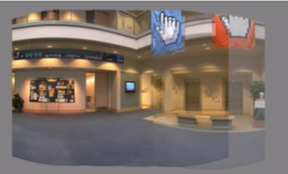

#### 2-5. 블랜딩 

Image Blending Techniques

---

##### 🎯 기본 개념

* \*\*Image Blending (이미지 블렌딩)\*\*은 여러 이미지를 자연스럽게 결합하여 하나의 통합된 이미지를 생성하는 기술입니다.
* 파노라마 스티칭, 노이즈 제거, HDR 합성 등 다양한 분야에서 활용됩니다.

---

##### 🛠️ 주요 기법

##### **1. Image Feathering**

* **목적**: 이미지의 연결 부위를 자연스럽게 섞어줌.
* **방법**:

  * 각 이미지에 대해 **Weight Map**을 생성하여 경계 부분에서 점진적으로 가중치를 줄임.
  * 모든 Weight의 합이 1이 되도록 정규화.
* **문제점**:

  * **Window Size**가 너무 크면 Ghosting 현상 발생.
  * **Window Size**가 너무 작으면 Seam (경계선) 노출.
* **해결**:

  * **Optimal Window Size**를 찾기 위해 **Multi-scale Blending** 사용.

---

##### **2. Laplacian Pyramid Image Blending**

* **목적**: 고주파와 저주파 성분을 각각 다르게 처리하여 경계 문제를 최소화.
* **방법**:

  * 고주파 (High Frequency) 영역: 작은 Window 사용 (Seam 감소)
  * 저주파 (Low Frequency) 영역: 큰 Window 사용 (Ghosting 감소)
* **특징**:

  * 계층적 피라미드를 사용하여 멀티 스케일 블렌딩 구현.

---

##### **3. Poisson Image Editing**

* **목적**: 경계의 색상 차이를 최소화하여 자연스러운 합성.
* **방법**:

  * 대상 이미지의 Gradient를 유지하며, 주변 환경에 자연스럽게 합성.
  * 경계에서의 Boundary Condition을 설정하여 Poisson 방정식 풀이.
* **예시**:

  * 얼굴 교체, 배경 복원, 객체 추가 등.

---

##### **4. De-Ghosting**

* **목적**: 빠르게 움직이는 객체가 겹칠 때 생기는 Ghosting 제거.
* **방법**:

  * **Local Alignment**: 작은 Translation이 있는 경우 픽셀 단위로 정렬.
  * **Cutout-based Compositing**: 객체의 형태를 잘라내어 배경에 맞춰 붙임.
* **특징**:

  * 복잡한 동작이 있는 장면에서도 자연스러운 합성 가능.

---

##### **5. Local Alignment (De-Ghosting)**

* **목적**: 미세한 움직임이 있는 이미지를 정렬하여 Ghosting 제거.
* **방법**:

  * 각 픽셀의 위치를 Warping하여 맞춤.
  * 거리 차이가 있는 객체를 강제로 정렬하여 결합.

---

##### **6. Cutout-based Compositing**

* **목적**: 이미지의 일부를 잘라서 다른 이미지에 붙일 때 최적의 Seam 찾기.
* **방법**:

  * 최적의 Cutout 경로를 찾아 자연스러운 합성 구현.
  * Poisson 방정식을 사용하여 경계에서의 불연속성을 최소화.

---


| **알고리즘 종류**                | **주요 특징** | **장점**      | **단점**      | **적용 사례**     |
| -------------------------- | --------- | ----------- | ----------- | ------------- |
| **Alpha Blending**         | 단순 가중치 기반 | 빠르고 간단      | 경계부에서 겹침 현상 | 파노라마, 객체 합성   |
| **Feathering**             | 가우시안 기반   | 부드러운 경계     | 블러 현상       | 이미지 합성        |
| **Pyramid Blending**       | 다중 해상도 기반 | 복잡한 경계 처리   | 계산 비용 큼     | 파노라마, HDR     |
| **Poisson Blending**       | 경계 일치     | 경계부 불연속 제거  | 매우 느림       | 객체 삽입, 배경 변경  |
| **Gradient Domain Fusion** | 그라디언트 매칭  | 자연스러운 경계    | 높은 계산 비용    | HDR, 복잡한 스티칭  |
| **Multi-band Blending**    | 다중 주파수 대역 | 자연스러운 합성    | 복잡한 계산      | 파노라마, HDR     |
| **Seam Carving**           | 에너지 최소화   | 최적의 경로 선택   | 계산 복잡도      | 객체 제거, 리사이즈   |
| **Graph-cut Blending**     | 최적 경로 탐색  | 고품질 합성      | 높은 메모리 사용   | 복잡한 장면 합성     |
| **GAN-based Blending**     | 딥러닝 기반    | 매우 자연스러운 결과 | 데이터 필요      | 얼굴 합성, 스타일 전이 |


### 3. Github: Panaromoa Python

출처: https://github.com/faisalimran2018/Panorama-python

In [ ]:
import cv2
import numpy as np
import sys

class Image_Stitching():
    def __init__(self) :
        self.ratio=0.85
        self.min_match=10
        self.sift=cv2.xfeatures2d.SIFT_create()
        self.smoothing_window_size=800

    def registration(self,img1,img2):
        kp1, des1 = self.sift.detectAndCompute(img1, None)
        kp2, des2 = self.sift.detectAndCompute(img2, None)
        matcher = cv2.BFMatcher()
        raw_matches = matcher.knnMatch(des1, des2, k=2)
        good_points = []
        good_matches=[]
        for m1, m2 in raw_matches:
            if m1.distance < self.ratio * m2.distance:
                good_points.append((m1.trainIdx, m1.queryIdx))
                good_matches.append([m1])
        img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=2)
        cv2.imwrite('matching.jpg', img3)
        if len(good_points) > self.min_match:
            image1_kp = np.float32(
                [kp1[i].pt for (_, i) in good_points])
            image2_kp = np.float32(
                [kp2[i].pt for (i, _) in good_points])
            H, status = cv2.findHomography(image2_kp, image1_kp, cv2.RANSAC,5.0)
        return H

    def create_mask(self,img1,img2,version):
        height_img1 = img1.shape[0]
        width_img1 = img1.shape[1]
        width_img2 = img2.shape[1]
        height_panorama = height_img1
        width_panorama = width_img1 +width_img2
        offset = int(self.smoothing_window_size / 2)
        barrier = img1.shape[1] - int(self.smoothing_window_size / 2)
        mask = np.zeros((height_panorama, width_panorama))
        if version== 'left_image':
            mask[:, barrier - offset:barrier + offset ] = np.tile(np.linspace(1, 0, 2 * offset ).T, (height_panorama, 1))
            mask[:, :barrier - offset] = 1
        else:
            mask[:, barrier - offset :barrier + offset ] = np.tile(np.linspace(0, 1, 2 * offset ).T, (height_panorama, 1))
            mask[:, barrier + offset:] = 1
        return cv2.merge([mask, mask, mask])

    def blending(self,img1,img2):
        H = self.registration(img1,img2)
        height_img1 = img1.shape[0]
        width_img1 = img1.shape[1]
        width_img2 = img2.shape[1]
        height_panorama = height_img1
        width_panorama = width_img1 +width_img2

        # panorama1 = np.zeros((height_panorama, width_panorama, 3))
        panorama1 = np.ones((height_panorama, width_panorama, 3))
        mask1 = self.create_mask(img1,img2,version='left_image')
        panorama1[0:img1.shape[0], 0:img1.shape[1], :] = img1
        panorama1 *= mask1
        mask2 = self.create_mask(img1,img2,version='right_image')
        panorama2 = cv2.warpPerspective(img2, H, (width_panorama, height_panorama))*mask2
        result=panorama1+panorama2

        rows, cols = np.where(result[:, :, 0] != 0)
        min_row, max_row = min(rows), max(rows) + 1
        min_col, max_col = min(cols), max(cols) + 1
        final_result = result[min_row:max_row, min_col:max_col, :]
        return final_result

#### 코드 리뷰 

#### Image Stitching 클래스 리뷰

이 코드는 두 이미지를 **SIFT** 특징 매칭을 이용하여 **파노라마** 이미지로 결합하는 **`Image_Stitching`** 클래스입니다. 전체적인 구조는 다음과 같습니다:

---

##### 📂 주요 구성

1. **초기화 (`__init__`)**
2. **특징점 매칭 및 호모그래피 계산 (`registration`)**
3. **마스크 생성 (`create_mask`)**
4. **이미지 블렌딩 (`blending`)**
5. \*\*메인 함수 (`main`)

---

##### 🔎 1. 초기화 (`__init__`)

* **매칭 필터링 비율 (`ratio`)**:

  * `0.85`로 설정, 일반적으로 `0.75`가 자주 사용됨.
* **최소 매칭 수 (`min_match`)**:

  * 호모그래피 계산을 위한 최소 매칭 점 수 (기본 10개).
* **SIFT 객체 생성 (`sift`)**:

  * OpenCV의 SIFT 생성 (추가 설치 필요).
* **스무딩 윈도우 사이즈 (`smoothing_window_size`)**:

  * 블렌딩 영역의 폭 (기본 800 픽셀).

---

##### 🔎 2. 특징점 매칭 (`registration`)

* **매칭**:

  * **KNN 매칭**을 사용하여 두 이미지의 특징점 매칭 (`knnMatch`).
* **좋은 매칭 필터링**:

  * **Lowe's Ratio Test** (`self.ratio`)로 좋은 매칭을 필터링.
* **호모그래피 계산**:

  * 매칭 점이 `self.min_match`보다 많을 때만 호모그래피 계산 (`cv2.findHomography`).
* **매칭 시각화**:

  * **매칭 결과**를 `matching.jpg` 파일로 저장.

---

##### 🔎 3. 마스크 생성 (`create_mask`)

* **마스크 생성**:

  * `left_image`와 `right_image`에 대해 각각 마스크를 생성.
* **블렌딩 영역**:

  * 스무딩 영역을 설정하여 부드러운 이미지 연결.
* **마스크 병합**:

  * 3채널 마스크 생성 (`cv2.merge`).

---

##### 🔎 4. 이미지 블렌딩 (`blending`)

* **호모그래피 변환**:

  * `registration()` 함수를 사용하여 호모그래피 계산.
* **마스크 적용**:

  * 각각의 이미지를 마스크와 곱하여 부드럽게 연결.
* **결과 자르기**:

  * 결과 이미지를 비어 있는 부분 없이 자르기.

---

##### 🔎 5. 메인 함수 (`main`)

* **파일 읽기**:

  * 두 이미지 파일을 읽어 `blending()` 함수로 전달.
* **예외 처리**:

  * 인자 누락 시 기본 메시지 출력.

---


### 4. 추가 참고 문헌 

https://donguk071.github.io/cv/2023/04/15/OpenCV2/

https://github.com/CorentinBrtx/image-stitching?tab=readme-ov-file 

https://github.com/OpenStitching/stitching

Projection: https://velog.io/@jungizz_/%EC%BB%B4%ED%93%A8%ED%84%B0-%EB%B9%84%EC%A0%BC-CV-05-Image-Stitching#1-cylindrical-projection